In [1]:
from keras import layers,models

model = models.Sequential()

Using TensorFlow backend.


In [2]:
from keras import layers
from keras import models
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [3]:
from keras import optimizers
model.compile(loss='binary_crossentropy',
optimizer=optimizers.RMSprop(lr=1e-4),
metrics=['acc'])

In [4]:
from keras.preprocessing.image import ImageDataGenerator

In [5]:
train_fun = ImageDataGenerator(1.0/255,
                              rotation_range = 40,
                              width_shift_range = 0.2,
                              height_shift_range = 0.2,
                              shear_range = 0.2,
                              zoom_range = 0.2,
                              horizontal_flip = True)

In [6]:
val_fun = ImageDataGenerator(1.0/255)
from google.colab import drive
drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive/


In [7]:
train_gen = train_fun.flow_from_directory("/content/drive/My Drive/app/train_small",
                                                   target_size = ((150,150)),
                                                   batch_size = 5,class_mode = "binary")

Found 170 images belonging to 2 classes.


In [8]:
val_gen = val_fun.flow_from_directory("/content/drive/My Drive/app/val_small",
                                               target_size = ((150,150)),
                                               batch_size = 3,class_mode = "binary")

Found 72 images belonging to 2 classes.


In [9]:
history = model.fit_generator(train_gen,steps_per_epoch=(85//5),epochs = 5,validation_data = val_gen,
                              validation_steps=(72//3))

Epoch 1/5


/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


17/17 [==============================] - 26s 2s/step - loss: 8.1757 - acc: 0.5765 - val_loss: 0.2476 - val_acc: 0.6111
Epoch 2/5
17/17 [==============================] - 8s 458ms/step - loss: 3.4443 - acc: 0.4824 - val_loss: 4.4722 - val_acc: 0.5000
Epoch 3/5
17/17 [==============================] - 6s 379ms/step - loss: 2.8555 - acc: 0.5294 - val_loss: 0.7510 - val_acc: 0.5417
Epoch 4/5
17/17 [==============================] - 6s 373ms/step - loss: 2.1378 - acc: 0.4353 - val_loss: 1.0431 - val_acc: 0.5556
Epoch 5/5
17/17 [==============================] - 6s 373ms/step - loss: 1.2410 - acc: 0.5647 - val_loss: 1.4381 - val_acc: 0.5556


In [10]:
model.save("/content/drive/My Drive/app/cats_dogs_model1.h5")

/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


<Figure size 432x288 with 0 Axes>

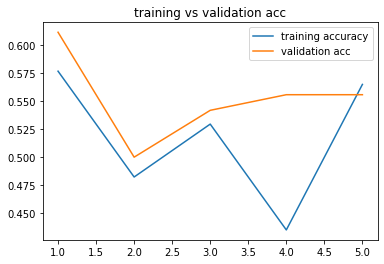

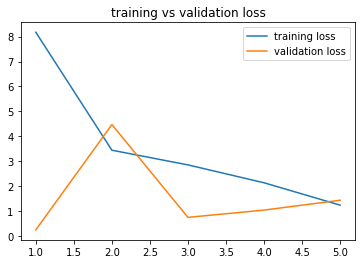

<Figure size 432x288 with 0 Axes>

In [11]:
import matplotlib.pyplot as plt
hist_dict = history.history
acc = hist_dict["acc"]
val_acc = hist_dict["val_acc"]
loss = hist_dict["loss"]
val_loss = hist_dict["val_loss"]

x = [x for x in range(1,5+1)]
plt.plot(x,acc,label = "training accuracy")
plt.plot(x,val_acc,label = "validation acc")
plt.title("training vs validation acc")
plt.legend()
plt.figure()

plt.plot(x,loss,label = "training loss")
plt.plot(x,val_loss,label = "validation loss")
plt.title("training vs validation loss")
plt.legend()
plt.figure()


visualizing intermediate activations 

In [12]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 15, 15, 128)      

In [13]:
from keras.preprocessing.image import image
import numpy as np
img = image.load_img("/content/drive/My Drive/app/train_small/cats/cat.0.jpg",target_size = (150,150))
img_tensor = image.img_to_array(img) #(150,150,3) doesnt include sample number
img_tensor = np.expand_dims(img_tensor,axis = 0)#include sample number
img_tensor = img_tensor / 255.0
img_tensor.shape

(1, 150, 150, 3)

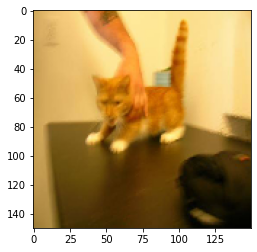

In [14]:
import matplotlib.pyplot as plt
plt.imshow(img_tensor[0])

In [15]:
from keras import models

In [16]:
layer_contents_full= [x.output for x in model.layers] #output of the layers for the prev trained model
layer_contents_first_eight = []
for i,x in enumerate(layer_contents_full):
  if i>=8: #first 8 layers' output
    break
  else:
    layer_contents_first_eight.append(x)
print(layer_contents_first_eight)
layer_outputs = [layer.output for layer in model.layers[:8]]
print(layer_outputs)


[<tf.Tensor 'conv2d_1/Relu:0' shape=(None, 148, 148, 32) dtype=float32>, <tf.Tensor 'max_pooling2d_1/MaxPool:0' shape=(None, 74, 74, 32) dtype=float32>, <tf.Tensor 'conv2d_2/Relu:0' shape=(None, 72, 72, 64) dtype=float32>, <tf.Tensor 'max_pooling2d_2/MaxPool:0' shape=(None, 36, 36, 64) dtype=float32>, <tf.Tensor 'conv2d_3/Relu:0' shape=(None, 34, 34, 128) dtype=float32>, <tf.Tensor 'max_pooling2d_3/MaxPool:0' shape=(None, 17, 17, 128) dtype=float32>, <tf.Tensor 'conv2d_4/Relu:0' shape=(None, 15, 15, 128) dtype=float32>, <tf.Tensor 'max_pooling2d_4/MaxPool:0' shape=(None, 7, 7, 128) dtype=float32>]
[<tf.Tensor 'conv2d_1/Relu:0' shape=(None, 148, 148, 32) dtype=float32>, <tf.Tensor 'max_pooling2d_1/MaxPool:0' shape=(None, 74, 74, 32) dtype=float32>, <tf.Tensor 'conv2d_2/Relu:0' shape=(None, 72, 72, 64) dtype=float32>, <tf.Tensor 'max_pooling2d_2/MaxPool:0' shape=(None, 36, 36, 64) dtype=float32>, <tf.Tensor 'conv2d_3/Relu:0' shape=(None, 34, 34, 128) dtype=float32>, <tf.Tensor 'max_pooli

In [17]:
activation_model = models.Model(inputs = model.input,outputs = layer_contents_first_eight)

In [18]:
activ_pred = activation_model.predict(img_tensor)

In [19]:
first_layer_pred = activ_pred[0] #activation of first conv layer on the img_tensor input
first_layer_pred.shape

(1, 148, 148, 32)

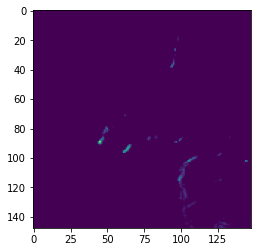

In [20]:
#visualize the fourth channel of the first layer output
forth_channel = first_layer_pred[0,:,:,4]
seventh_channel = first_layer_pred[0,:,:,7]
plt.imshow(first_layer_pred[0,:,:,4])


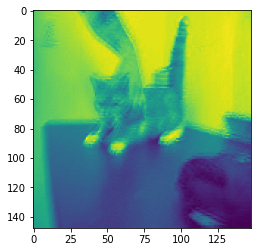

In [21]:
plt.imshow(first_layer_pred[0,:,:,7])

In [22]:
print(len(activ_pred))
print(activ_pred[1].shape)

8
(1, 74, 74, 32)


In [24]:
'''layer_names = [layer.name for layer in model.layers[:8]]
images per row = 16'''

'layer_names = [layer.name for layer in model.layers[:8]]\nimages per row = 16'

In [ ]:
'''for i in range(len(activ_pred)):
  i_layer_img = activ_pred[i]
  #print(i_layer_img)
  #print(i_layer_img.shape[-1])
  for j in range(i_layer_img.shape[-1]):
    plt.matshow(i_layer_img[0,:,:,j])'''

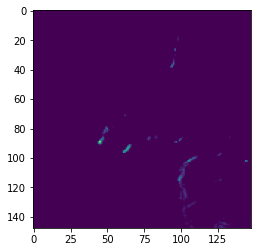

In [25]:
i_layer_img = activ_pred[0]
plt.imshow(i_layer_img[0,:,:,4])

In [32]:
#defining the loss tensor
from keras.applications import VGG16
from keras import backend
model = VGG16(weights = "imagenet",include_top = False)
layer_name = "block3_conv1"
filter_index = 0
layer_output = model.get_layer(name = layer_name).output
loss = backend.mean(layer_output[:,:,:,filter_index]) #0th filter of the output layer named "block3_conv1"



In [36]:
#obtaining the gradient of the loss against input
grads = backend.gradients(loss,model.input)[0]



In [37]:
#let us normalize the gradient tensor so that the changes done to the input image is within a range of values
grads /=      (backend.sqrt(backend.mean(backend.square(grads))))

In [38]:
#instantinating a keras function that takes input tensor and returns output tensors
iterate = backend.function([model.input],[loss,grads])
import numpy as np
loss_value,grdas_value = iterate(np.zeros((1,150,150,3)))